In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_data.csv to student_data.csv


In [3]:
data = pd.read_csv("student_data.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [5]:
X = data[["studytime", "G3"]]

In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
data["Cluster"] = kmeans.fit_predict(X)

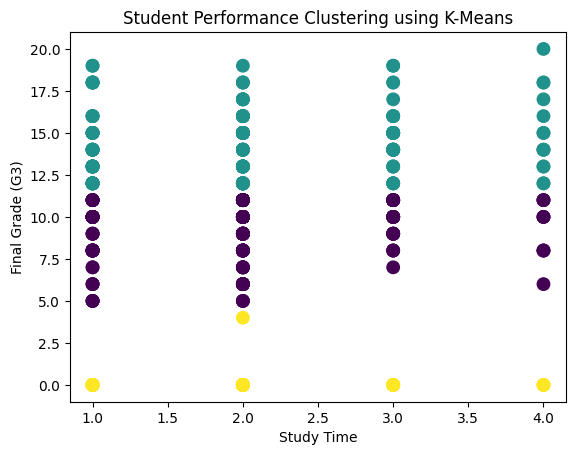

In [7]:
plt.scatter(X["studytime"], X["G3"], c=data["Cluster"], s=80)
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.title("Student Performance Clustering using K-Means")
plt.show()

In [8]:
for i in range(3):
    print(f"\nCluster {i} summary:")
    print(data[data["Cluster"] == i][["studytime", "G3"]].describe())


Cluster 0 summary:
        studytime          G3
count  194.000000  194.000000
mean     1.989691    9.139175
std      0.768483    1.696144
min      1.000000    5.000000
25%      2.000000    8.000000
50%      2.000000   10.000000
75%      2.000000   10.000000
max      4.000000   11.000000

Cluster 1 summary:
        studytime          G3
count  162.000000  162.000000
mean     2.104938   14.425926
std      0.902777    1.977531
min      1.000000   12.000000
25%      1.000000   13.000000
50%      2.000000   14.000000
75%      3.000000   15.000000
max      4.000000   20.000000

Cluster 2 summary:
       studytime         G3
count  39.000000  39.000000
mean    1.974359   0.102564
std     0.902837   0.640513
min     1.000000   0.000000
25%     1.000000   0.000000
50%     2.000000   0.000000
75%     2.000000   0.000000
max     4.000000   4.000000


In [9]:
new_student = [[3, 15]]  # study 3 hours/week, final grade 15/20
cluster = kmeans.predict(new_student)
print("Predicted Group:", cluster[0])

Predicted Group: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
